# Data Pipeline

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats

models = [
    # ['no_curtail',      'experiments/gcn_sac/no_curtail/data/val/episode.csv',        "red"],
    # ['no_limit',        'experiments/gcn_sac/no_limit/data/val/episode.csv',          "orange"],
    # ['fixed_limit',     'experiments/gcn_sac/fixed_curtail/data/val/episode.csv',     "green"],
    # ['sqrt_limit',      'experiments/gcn_sac/sqrt_curtail/data/val/episode.csv',      "yellow"],
    # ['sac_no_curtail',  "experiments/sac/no_curtail/data/train/episode.csv", "lightblue"],
    # ['bon_4',  "experiments/gcn_sac/2/bon_4/data/train/episode.csv", "red"],
    # ['bon_6',  "experiments/gcn_sac/2/bon_6/data/train/episode.csv", "orange"],
    # ['bon_8',  "experiments/gcn_sac/2/bon_8/data/train/episode.csv", "green"],
    # ['pen_6',  "experiments/gcn_sac/2/pen_6/data/train/episode.csv", "purple"],
    # ['pen_8',  "experiments/gcn_sac/2/pen_8/data/train/episode.csv", "brown"],
    ['less_out',  "experiments/gcn_sac/2/less_out/data/train/episode.csv", "pink"],
    ['sac_curtail',  "experiments/sac/curtail/data/train/episode.csv", "blue"],
    ['pen_4',  "experiments/gcn_sac/2/pen_4/data/train/episode.csv", "yellow"],
    ['3_scaled_step',  "experiments/gcn_sac/3/3_scaled_step/data/train/episode.csv", "red"],
    ['3_scaled_time',  "experiments/gcn_sac/3/3_scaled_time/data/train/episode.csv", "green"],
    ['3_step',  "experiments/gcn_sac/3/3_step/data/train/episode.csv", "brown"],
    ['3_time',  "experiments/gcn_sac/3/3_time/data/train/episode.csv", "purple"],
]


window_size = 250  # Change this based on your needs
frac = 0.2
lowess = sm.nonparametric.lowess

graph = "avg"

match graph:
    case "actual":
        graph = ""
    case "avg":
        graph = "_mavg"
    case "loess":
        graph = "_lowess"

## Accumulative Reward

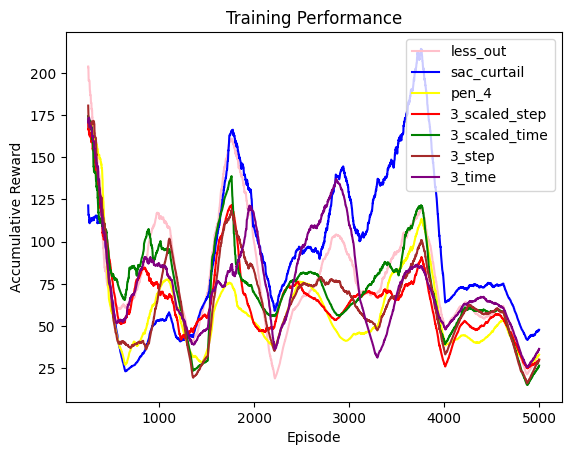

In [25]:

# Specify the path to your CSV file

for model in models:
    model.append(pd.read_csv(model[1]))
    df = model[3]
    # df = df[np.abs(stats.zscore(df['Accumulative Reward'])) < 3]
    df['acc_reward_mavg'] = df['acc_reward'].rolling(window=window_size).mean()

    df_s = lowess(df['acc_reward'], df['episode'], frac=frac)

    df['acc_reward_lowess'] = df_s[:, 1]

    plt.plot(df['episode'], df['acc_reward' + graph], color=model[2])
    

# Customize the plot
plt.title('Training Performance')
plt.xlabel('Episode')
plt.ylabel('Accumulative Reward')
plt.legend([model[0] for model in models])

# Show the plot
plt.show()

## Survival Rate

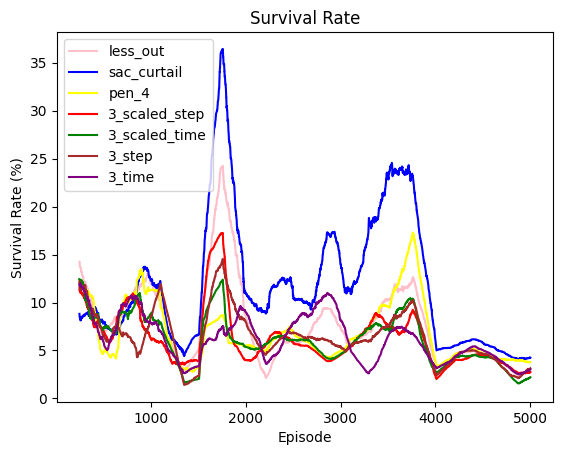

In [26]:

for model in models:
    df = model[3]
    df['survival_rate'] = df['length'] / 2016 * 100
    df['survival_rate_mavg'] = df['survival_rate'].rolling(window=window_size).mean()

    df_s = lowess(df['survival_rate'], df['episode'], frac=frac)

    df['survival_rate_lowess'] = df_s[:, 1]

    plt.plot(df['episode'], df['survival_rate' + graph], color=model[2])
    

# Customize the plot
plt.title('Survival Rate')
plt.xlabel('Episode')
plt.ylabel('Survival Rate (%)')
plt.legend([model[0] for model in models])

# Show the plot
plt.show()

## Daily Operating Cost

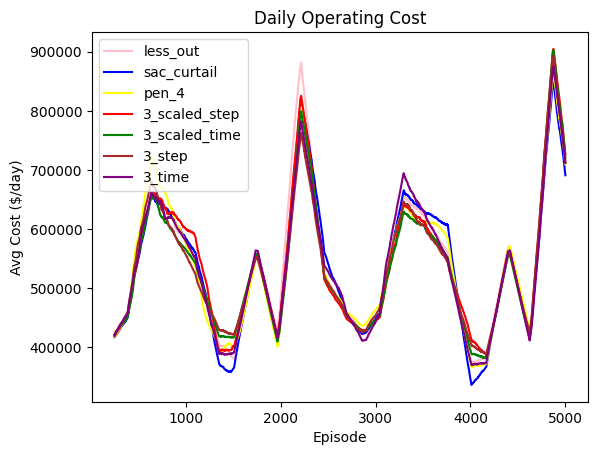

In [27]:
for model in models:
    df = model[3]
    # df['Avg Cost'] = df['cost'] / 2016
    df['cost_mavg'] = df['cost'].rolling(window=window_size).mean()

    df_s = lowess(df['cost'], df['episode'], frac=frac)

    df['cost_lowess'] = df_s[:, 1]

    plt.plot(df['episode'], df['cost' + graph], color=model[2])

# Customize the plot
plt.title('Daily Operating Cost')
plt.xlabel('Episode')
plt.ylabel('Avg Cost ($/day)')
plt.legend([model[0] for model in models])

# Show the plot
plt.show()

## Average Wasted Renewable Energy

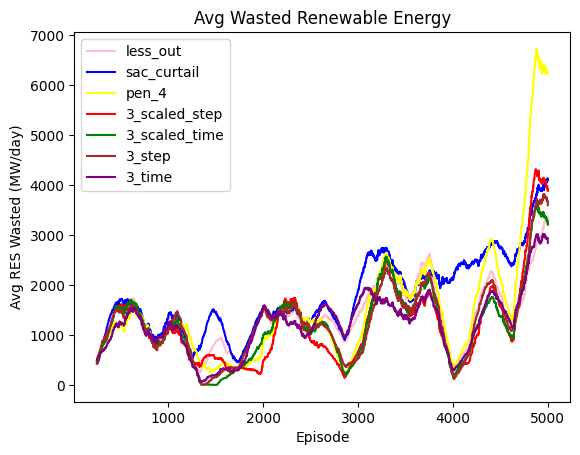

In [28]:
for model in models:
    df = model[3]
    df['res_wasted_mavg'] = df['res_wasted'].rolling(window=window_size).mean()

    df_s = lowess(df['res_wasted'], df['episode'], frac=frac)

    df['res_wasted_lowess'] = df_s[:, 1]

    plt.plot(df['episode'], df['res_wasted' + graph], color=model[2])


# Customize the plot
plt.title('Avg Wasted Renewable Energy')
plt.xlabel('Episode')
plt.ylabel('Avg RES Wasted (MW/day)')
plt.legend([model[0] for model in models])

# Show the plot
plt.show()